In [2]:
import pandas as pd

In [3]:
customers_df = pd.read_csv('data/raw/customers.csv')
transactions_df = pd.read_csv('data/raw/transactions.csv')

## Understanding the Dataset

In [26]:
customers_df.head()

,customer_id,country,signup_date,email
0,1,DK,2022-01-22,user0@example.com
1,2,FI,2021-12-22,user1@example.com
2,3,SE,2023-08-18,user2@example.com
3,4,DK,2022-01-25,user3@example.com
4,5,DK,2019-09-26,user4@example.com


In [5]:
customers_df.columns

Index(['customer_id', 'country', 'signup_date', 'email'], dtype='object')

In [24]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  5000 non-null   int64 
 1   country      5000 non-null   object
 2   signup_date  5000 non-null   object
 3   email        5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [19]:
customers_df.isnull().sum()

customer_id    0
country        0
signup_date    0
email          0
dtype: int64

In [17]:
customers_df.duplicated().sum()

np.int64(0)

In [27]:
transactions_df.head()

,transaction_id,customer_id,amount,currency,timestamp,category
0,0,1971.0,126.58,SEK,2020-04-29 06:17:00,NaN
1,1,3823.0,43.79,NOK,2020-03-28 15:14:00,food
2,2,2820.0,53.29,eur,2020-03-08 22:40:00,electronics
3,3,903.0,132.21,EUR,2020-11-23 01:02:00,unknown
4,4,365.0,75.50,SEK,2020-02-09 04:54:00,unknown


In [13]:
transactions_df.columns

Index(['transaction_id', 'customer_id', 'amount', 'currency', 'timestamp',
       'category'],
      dtype='object')

In [25]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122000 entries, 0 to 121999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  122000 non-null  int64  
 1   customer_id     121970 non-null  float64
 2   amount          122000 non-null  float64
 3   currency        97356 non-null   object 
 4   timestamp       122000 non-null  object 
 5   category        101780 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.6+ MB


In [16]:
transactions_df.isnull().sum()

transaction_id        0
customer_id          30
amount                0
currency          24644
timestamp             0
category          20220
dtype: int64

In [18]:
transactions_df.duplicated().sum()

np.int64(2000)

In [21]:
print(transactions_df.describe())

       transaction_id    customer_id         amount
count    122000.00000  121970.000000  122000.000000
mean      59994.12109    2503.117586     100.083971
std       34652.75182    1444.491884      40.001002
min           0.00000       1.000000     -58.830000
25%       29982.75000    1253.000000      73.130000
50%       59983.50000    2511.000000     100.020000
75%       90007.00000    3753.000000     126.910000
max      119999.00000    5000.000000     263.110000


Note:

ToDO:

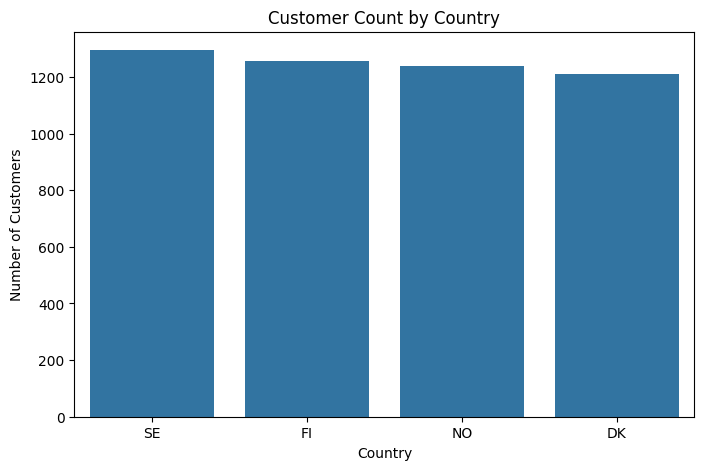

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Country distribution
plt.figure(figsize=(8,5))
sns.countplot(data=customers_df, x='country', order=customers_df['country'].value_counts().index)
plt.title("Customer Count by Country")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.show()

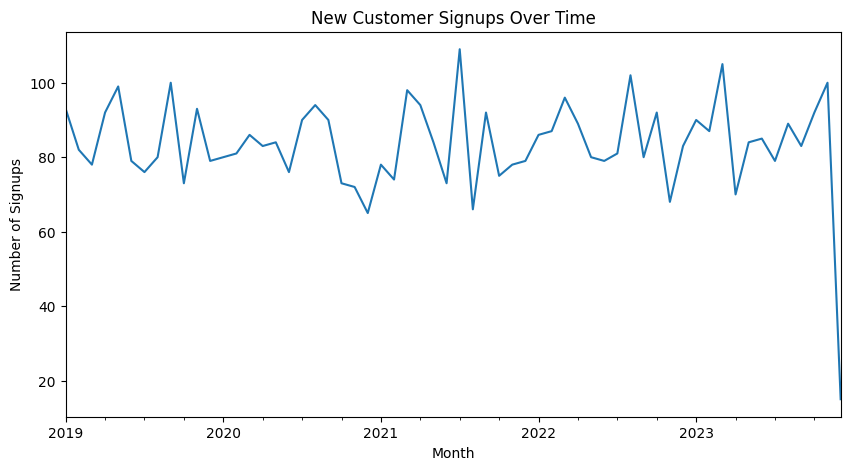

In [30]:
# Signup trend over time
customers_df['signup_date'] = pd.to_datetime(customers_df['signup_date'])
signup_per_month = customers_df.groupby(customers_df['signup_date'].dt.to_period('M')).size()

signup_per_month.plot(kind='line', figsize=(10,5))
plt.title("New Customer Signups Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.show()

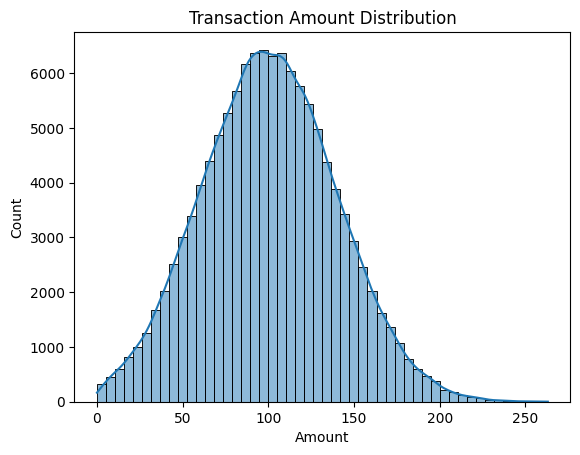

In [31]:
# Remove obvious negative amounts for plotting
sns.histplot(transactions_df[transactions_df['amount'] >= 0]['amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

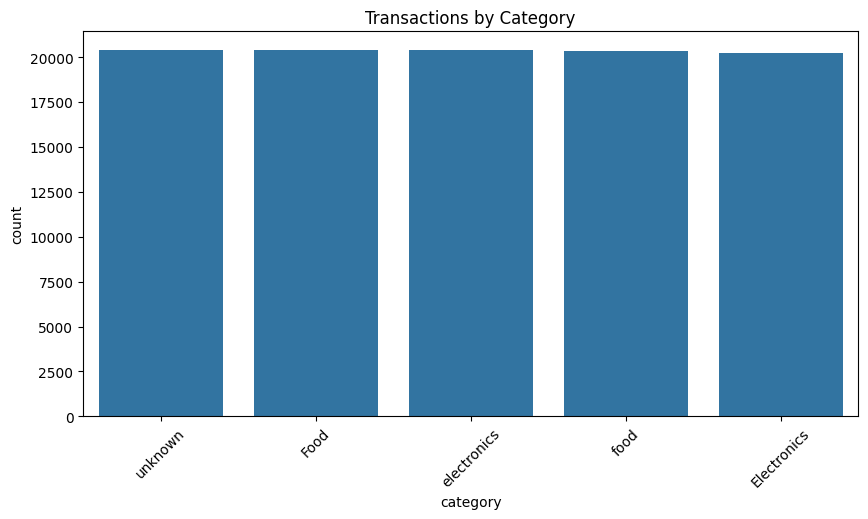

In [32]:
# Transactions per category
plt.figure(figsize=(10,5))
sns.countplot(data=transactions_df, x='category', order=transactions_df['category'].value_counts().index)
plt.title("Transactions by Category")
plt.xticks(rotation=45)
plt.show()

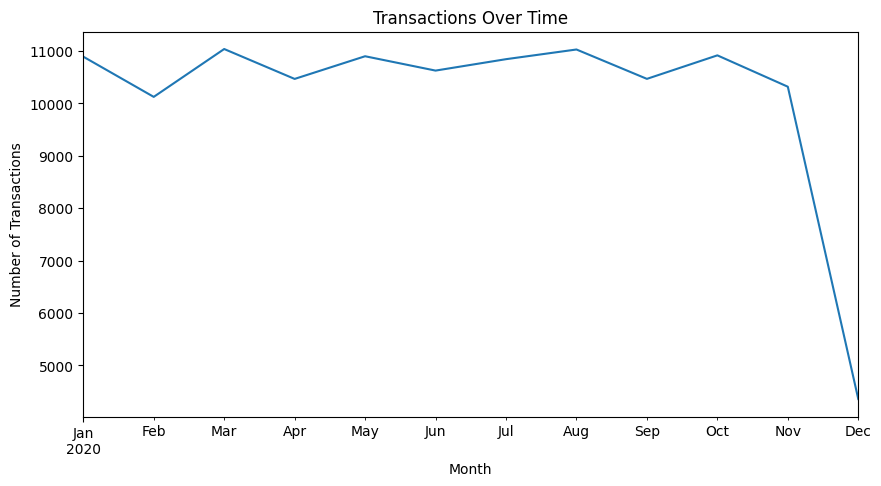

In [33]:
# Transactions over time
transactions_df['timestamp'] = pd.to_datetime(transactions_df['timestamp'])
transactions_per_month = transactions_df.groupby(transactions_df['timestamp'].dt.to_period('M')).size()
transactions_per_month.plot(kind='line', figsize=(10,5))
plt.title("Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

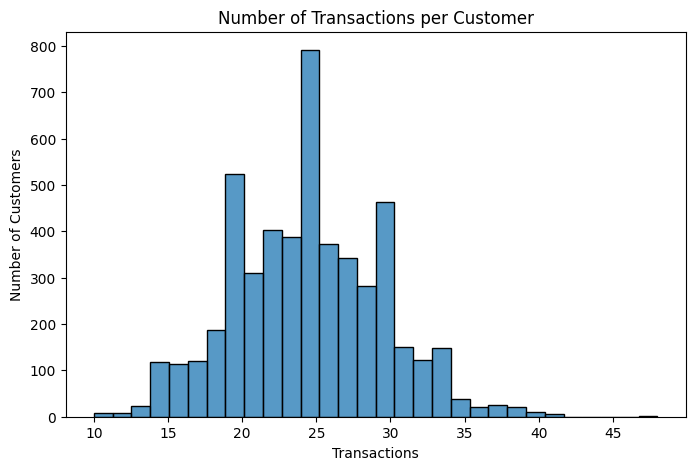

In [34]:
# Transactions per customer
transactions_per_customer = transactions_df.groupby('customer_id').size()
plt.figure(figsize=(8,5))
sns.histplot(transactions_per_customer, bins=30)
plt.title("Number of Transactions per Customer")
plt.xlabel("Transactions")
plt.ylabel("Number of Customers")
plt.show()

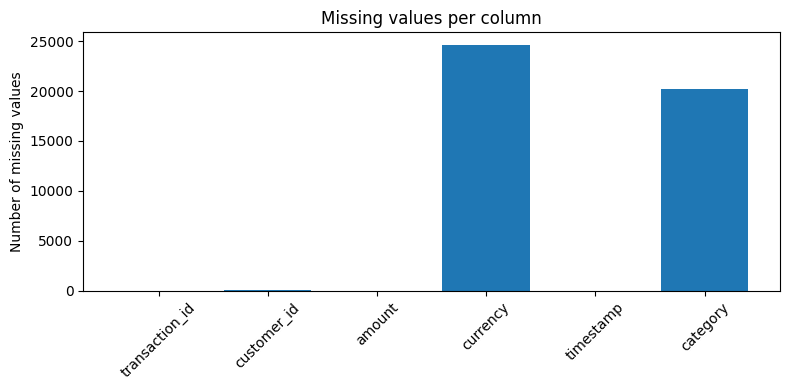

In [37]:
# plotting missing values of transactions. (customers_df is clean)
missing_counts = transactions_df.isnull().sum()

plt.figure(figsize=(8, 4))
plt.bar(missing_counts.index, missing_counts.values)
plt.ylabel("Number of missing values")
plt.title("Missing values per column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()